In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [ ]:
Data = pd.read_csv('insurance.csv')

In [ ]:
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
Data.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [ ]:
Data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
Data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
Data['sex'] = Data['sex'].map({'male': 0 , 'female': 1})
Data['smoker'] = Data['smoker'].map({'yes': 1 , 'no': 0})

In [ ]:
def categorize_bmi(bmi):
  if bmi < 18.5:
    return 'bajo peso'
  elif 18.5 <= bmi < 25:
    return 'normal'
  elif 25 <= bmi < 30:
    return 'sobrepeso'
  else:
    return 'obesidad'

Data['bmi_category'] = Data['bmi'].apply(categorize_bmi)

In [ ]:
Data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,1,27.900,0,1,southwest,16884.92400,sobrepeso
1,18,0,33.770,1,0,southeast,1725.55230,obesidad
2,28,0,33.000,3,0,southeast,4449.46200,obesidad
3,33,0,22.705,0,0,northwest,21984.47061,normal
4,32,0,28.880,0,0,northwest,3866.85520,sobrepeso


In [ ]:
Data.dtypes

,0
age,int64
sex,int64
bmi,float64
children,int64
smoker,int64
region,object
charges,float64
bmi_category,object


In [ ]:
import sqlite3
conn = sqlite3.connect('insurance.db')


In [ ]:
Data.to_sql('insurance', conn, if_exists='replace', index=False)

1338

In [ ]:
cursor = conn.cursor()
cursor.execute("SELECT * FROM insurance LIMIT 5;")
print(cursor.fetchall())

[(19, 1, 27.9, 0, 1, 'southwest', 16884.924, 'sobrepeso'), (18, 0, 33.77, 1, 0, 'southeast', 1725.5523, 'obesidad'), (28, 0, 33.0, 3, 0, 'southeast', 4449.462, 'obesidad'), (33, 0, 22.705, 0, 0, 'northwest', 21984.47061, 'normal'), (32, 0, 28.88, 0, 0, 'northwest', 3866.8552, 'sobrepeso')]


In [ ]:
conn.close()

In [ ]:
def load_data(df, db_name='insurance.db', table_name='insurance'):
  import sqlite3
  conn = sqlite3.connect(db_name)
  df.to_sql(table_name, conn, if_exists='replace', index=False)
  conn.close()

In [ ]:
load_data(Data)



In [ ]:
# Configuraciones estéticas
sns.set(style="whitegrid")
%matplotlib inline

In [ ]:
conn = sqlite3.connect('insurance.db')

In [ ]:
query = "SELECT * FROM insurance;"
df = pd.read_sql_query(query, conn)

In [ ]:
conn.close()

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,1,27.900,0,1,southwest,16884.92400,sobrepeso
1,18,0,33.770,1,0,southeast,1725.55230,obesidad
2,28,0,33.000,3,0,southeast,4449.46200,obesidad
3,33,0,22.705,0,0,northwest,21984.47061,normal
4,32,0,28.880,0,0,northwest,3866.85520,sobrepeso


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1338 non-null   int64  
 1   sex           1338 non-null   int64  
 2   bmi           1338 non-null   float64
 3   children      1338 non-null   int64  
 4   smoker        1338 non-null   int64  
 5   region        1338 non-null   object 
 6   charges       1338 non-null   float64
 7   bmi_category  1338 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 83.8+ KB


In [ ]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


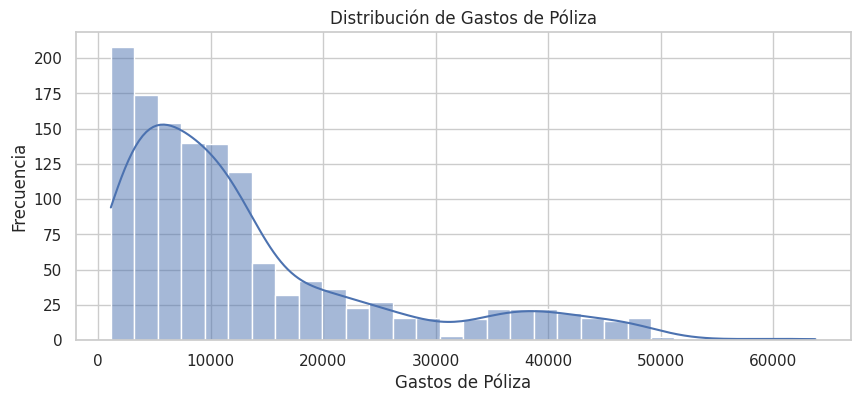

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df['charges'], kde=True)
plt.title('Distribución de Gastos de Póliza')
plt.xlabel('Gastos de Póliza')
plt.ylabel('Frecuencia')
plt.show()

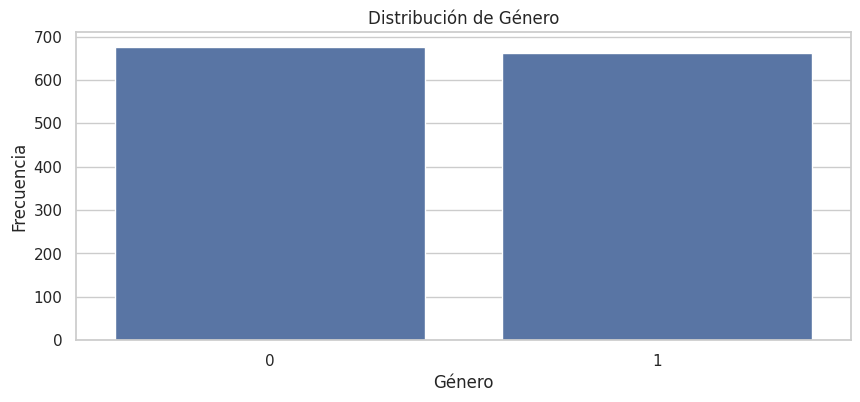

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='sex', data = df)
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

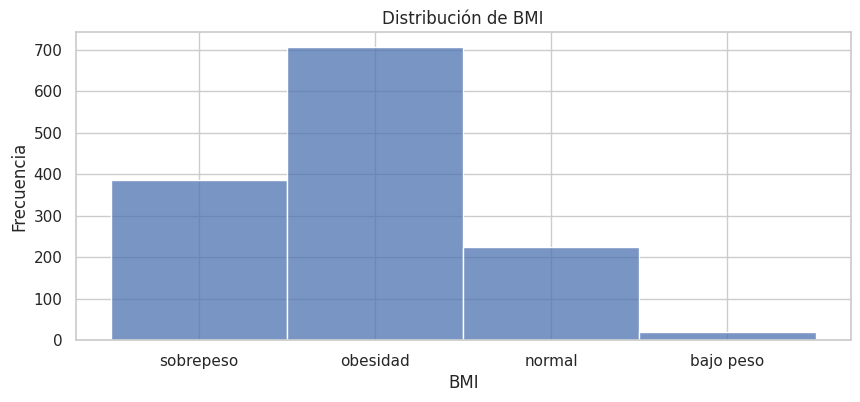

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df['bmi_category'])
plt.title('Distribución de BMI')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.show()

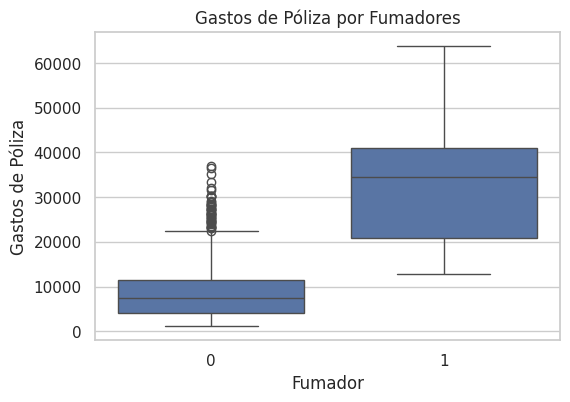

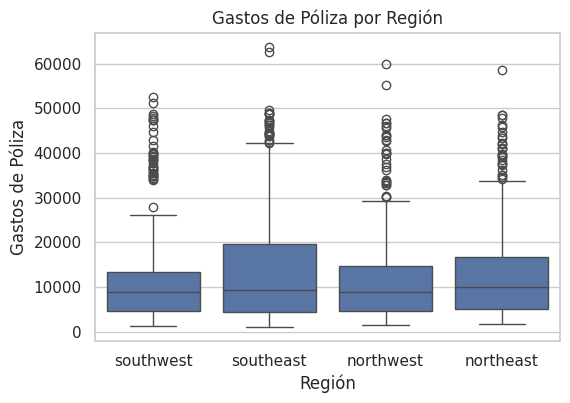

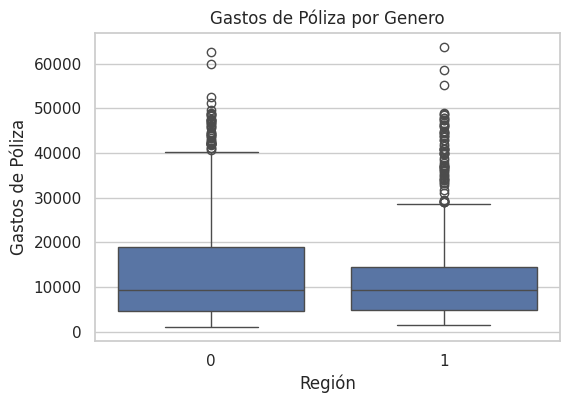

In [ ]:
# PREGUNTA: ¿los fumadores pagan más?
plt.figure(figsize=(6,4))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Gastos de Póliza por Fumadores')
plt.xlabel('Fumador')
plt.ylabel('Gastos de Póliza')

plt.figure(figsize=(6,4))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Gastos de Póliza por Región')
plt.xlabel('Región')
plt.ylabel('Gastos de Póliza')

plt.figure(figsize=(6,4))
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Gastos de Póliza por Genero')
plt.xlabel('Región')
plt.ylabel('Gastos de Póliza')
plt.show()

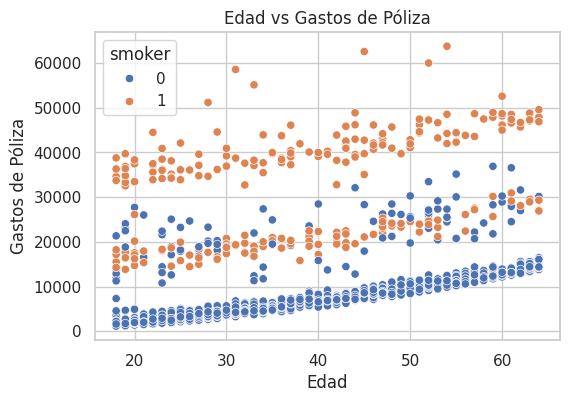

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title('Edad vs Gastos de Póliza')
plt.xlabel('Edad')
plt.ylabel('Gastos de Póliza')
plt.show()

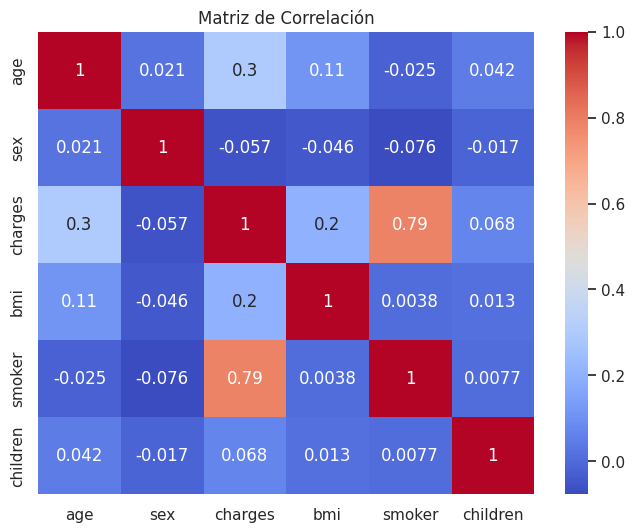

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['age','sex','charges','bmi','smoker','children']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
#Construccion de un modelo predictivo

#Aplicando One-Hot Encoding a la columna region
df_model = pd.get_dummies(df, columns=['region'], prefix='region', drop_first=True)
df_model.head()

,age,sex,bmi,children,smoker,charges,bmi_category,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,sobrepeso,False,False,True
1,18,0,33.770,1,0,1725.55230,obesidad,False,True,False
2,28,0,33.000,3,0,4449.46200,obesidad,False,True,False
3,33,0,22.705,0,0,21984.47061,normal,True,False,False
4,32,0,28.880,0,0,3866.85520,sobrepeso,True,False,False


In [ ]:
X = df_model.drop(['charges', 'bmi_category'], axis=1)
y = df_model['charges']

In [ ]:
#Importando librerias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [ ]:
#Funcion para evaluar los modelos
def evaluar_modelos_splits(X, y, splits=[0.2, 0.3, 0.1], random_state=42):
  resultados = []

  for test_size in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    #Modelo 1: Regresion lineal
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)

    #Modelo 2: Random Forest
    rf = RandomForestRegressor(random_state=random_state)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)

    #Metricas para Modelos 1 y 2
    for modelo, y_pred, nombre in [(lr, y_pred_lr, 'Regresion Lineal'), (rf, y_pred_rf, 'Random Forest')]:
      mae = mean_absolute_error(y_test, y_pred)
      mse = mean_squared_error(y_test, y_pred)
      rmse = np.sqrt(mse) # Calculate RMSE manually
      r2 = r2_score(y_test, y_pred)

      resultados.append({
          'Modelo': nombre,
          'Test Size': f'{int(test_size*100)}%',
          'MAE': round(mae,2),
          'RMSE': round(rmse,2),
          'R2': round(r2,2)
      })

  return pd.DataFrame(resultados)

In [ ]:
df_resultados = evaluar_modelos_splits(X, y)
df_resultados

,Modelo,Test Size,MAE,RMSE,R2
0,Regresion Lineal,20%,4181.19,5796.28,0.78
1,Random Forest,20%,2529.06,4550.74,0.87
2,Regresion Lineal,30%,4145.45,5812.10,0.77
3,Random Forest,30%,2641.09,4616.82,0.85
4,Regresion Lineal,10%,4087.53,5681.18,0.77
5,Random Forest,10%,2605.87,4728.53,0.84


In [ ]:
#Interpretacion de los resultados y optimizacion

In [ ]:
#Filtrado de outliers
# Paso 1: Calcular IQR
Q1 = df_model['charges'].quantile(0.25)
Q3 = df_model['charges'].quantile(0.75)
IQR = Q3 - Q1

# Paso 2: Límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Paso 3: Filtrar
df_sin_outliers = df_model[(df_model['charges'] >= limite_inferior) &
                           (df_model['charges'] <= limite_superior)]


In [ ]:
print("Tamaño original:", df_model.shape)
print("Tamaño sin outliers:", df_sin_outliers.shape)


Tamaño original: (1338, 10)
Tamaño sin outliers: (1199, 10)


In [ ]:
X_sin = df_sin_outliers.drop(['charges', 'bmi_category'],axis=1)
y_sin = df_sin_outliers['charges']


In [ ]:
df_resultados_sin = evaluar_modelos_splits(X_sin, y_sin)
df_resultados_sin

,Modelo,Test Size,MAE,RMSE,R2
0,Regresion Lineal,20%,2796.37,5257.93,0.56
1,Random Forest,20%,2702.42,5288.93,0.55
2,Regresion Lineal,30%,2733.81,5145.39,0.55
3,Random Forest,30%,2760.81,5217.12,0.54
4,Regresion Lineal,10%,2977.64,5488.41,0.56
5,Random Forest,10%,3083.60,5815.04,0.51


In [ ]:
  df_model['charges_log'] = np.log1p(df_model['charges'])

In [ ]:
X_log = df_model.drop(['charges', 'charges_log','bmi_category'], axis=1)
y_log = df_model['charges_log']  # variable objetivo transformada

In [ ]:
#Funcion para evaluar modelos con XGBoost
from xgboost import XGBRegressor

def evaluar_modelos_log_transform(X_log, y_log, test_size=0.2, random_state=42):
    resultados = []
    modelos_entrenados = {}
    # Split
    X_train, X_test, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=test_size, random_state=random_state)

    modelos = {
        'Regresión Lineal': LinearRegression(),
        'XGBoost': XGBRegressor(n_estimators=100, random_state=random_state),
        'Random Forest': RandomForestRegressor(random_state=random_state),
    }

    for nombre, modelo in modelos.items():
        modelo.fit(X_train, y_train_log)

        #Guardar el modelo entrenado
        modelos_entrenados[nombre] = modelo

        # Predicción en escala logarítmica
        y_pred_log = modelo.predict(X_test)

        # Volver a escala original
        y_pred = np.expm1(y_pred_log)
        y_test = np.expm1(y_test_log)

        # Métricas
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        resultados.append({
            'Modelo': nombre,
            'MAE': round(mae, 2),
            'RMSE': round(rmse, 2),
            'R2': round(r2, 4)
        })

    return pd.DataFrame(resultados), modelos_entrenados


In [ ]:
df_resultados_log, modelos_entrenados = evaluar_modelos_log_transform(X_log, y_log)
df_resultados_log

,Modelo,MAE,RMSE,R2
0,Regresión Lineal,3888.44,7814.06,0.6067
1,XGBoost,2506.02,4997.43,0.8391
2,Random Forest,2085.10,4369.68,0.8770


In [ ]:
modelo_random_forest = modelos_entrenados['Random Forest']

In [ ]:
# Extraer importancias
importancias = modelo_random_forest.feature_importances_
columnas = X_log.columns

# Crear dataframe para ordenarlas
df_importancias = pd.DataFrame({
    'Variable': columnas,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

/tmp/ipython-input-668410980.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=df_importancias, palette='viridis')


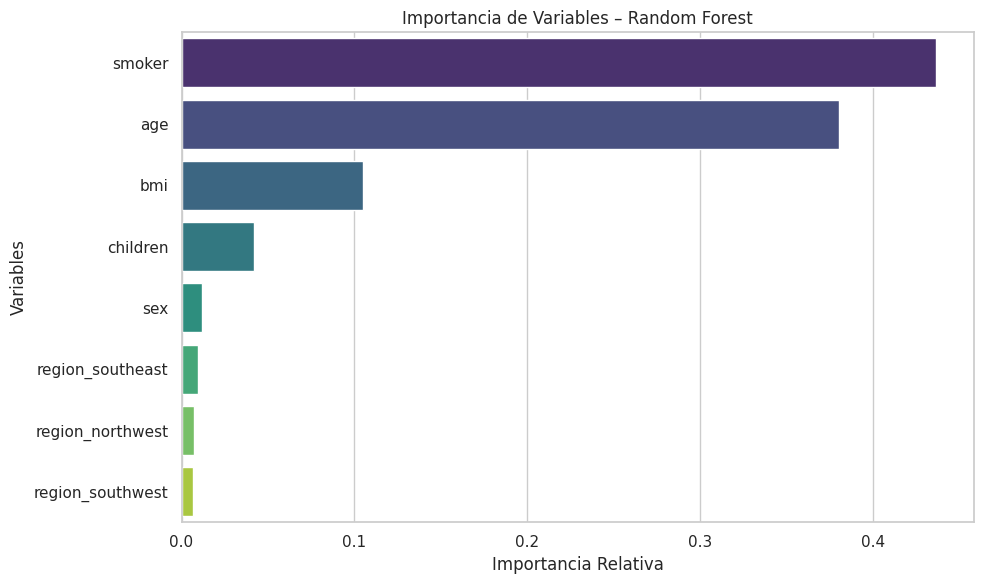

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importancia', y='Variable', data=df_importancias, palette='viridis')
plt.title('Importancia de Variables – Random Forest')
plt.xlabel('Importancia Relativa')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()


In [ ]:
import joblib

# Guarda el modelo entrenado
joblib.dump(modelo_random_forest, 'modelo_rf_log.pkl')


['modelo_rf_log.pkl']

In [ ]:
columnas = list(X.columns)
joblib.dump(columnas, 'columnas_modelo.pkl')


['columnas_modelo.pkl']

In [ ]:
from google.colab import files

files.download('modelo_rf_log.pkl')
files.download('columnas_modelo.pkl')
files.download('app.py')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>